# Linear Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

from torch import optim
from torch.autograd import Variable

Text(0.5,1,'Random, Linear Data')

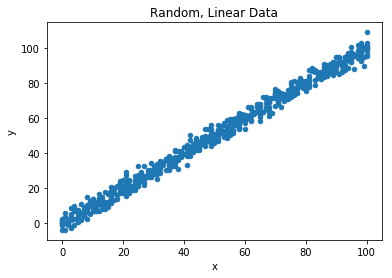

In [2]:
train_df, test_df = map(pd.read_csv, ('train.csv', 'test.csv'))
train_df.plot(kind='scatter', x='x', y='y')
plt.title('Random, Linear Data')

In [7]:
def to_tensors(df):
    return map(torch.from_numpy, (df.x.astype('float32').values, df.y.astype('float32').values))

# Convert to tensors
(x_train, y_train), (x_test, y_test) = map(to_tensors, (train_df, test_df))

# Transpose
x_train, y_train, x_test, y_test = map(lambda tensor: tensor.view(-1, 1),
                                       (x_train, y_train, x_test, y_test))

In [8]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [9]:
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [10]:
n_epochs = 1000
for i in range(n_epochs):
    inputs, target = map(Variable, (x_train, y_train))
    
    # Propagate forwards
    output = model(inputs)
    loss = criterion(output, target)
    
    # Propagate backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 20 == 0:
        print(f'Epoch {i}/{n_epochs}', 'loss: {:.6f}'.format(loss))
        
model.eval()

Epoch 0/1000 loss: nan
Epoch 20/1000 loss: nan
Epoch 40/1000 loss: nan
Epoch 60/1000 loss: nan
Epoch 80/1000 loss: nan
Epoch 100/1000 loss: nan
Epoch 120/1000 loss: nan
Epoch 140/1000 loss: nan
Epoch 160/1000 loss: nan
Epoch 180/1000 loss: nan
Epoch 200/1000 loss: nan
Epoch 220/1000 loss: nan
Epoch 240/1000 loss: nan
Epoch 260/1000 loss: nan
Epoch 280/1000 loss: nan
Epoch 300/1000 loss: nan
Epoch 320/1000 loss: nan
Epoch 340/1000 loss: nan
Epoch 360/1000 loss: nan
Epoch 380/1000 loss: nan
Epoch 400/1000 loss: nan
Epoch 420/1000 loss: nan
Epoch 440/1000 loss: nan
Epoch 460/1000 loss: nan
Epoch 480/1000 loss: nan
Epoch 500/1000 loss: nan
Epoch 520/1000 loss: nan
Epoch 540/1000 loss: nan
Epoch 560/1000 loss: nan
Epoch 580/1000 loss: nan
Epoch 600/1000 loss: nan
Epoch 620/1000 loss: nan
Epoch 640/1000 loss: nan
Epoch 660/1000 loss: nan
Epoch 680/1000 loss: nan
Epoch 700/1000 loss: nan
Epoch 720/1000 loss: nan
Epoch 740/1000 loss: nan
Epoch 760/1000 loss: nan
Epoch 780/1000 loss: nan
Epoch 

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)